In [19]:
from surprise import SVD, KNNBasic
from surprise.model_selection import cross_validate
import pandas as pd
from surprise import Dataset, Reader
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
df = pd.read_csv('ratings_small.csv')

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[["userId", "movieId", "rating"]], reader)

algoPMF = SVD(biased=False)

cross_validate(algoPMF, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0155  1.0076  1.0117  0.9969  1.0210  1.0105  0.0081  
MAE (testset)     0.7847  0.7749  0.7847  0.7694  0.7866  0.7801  0.0067  
Fit time          0.78    0.81    0.82    0.79    0.80    0.80    0.01    
Test time         0.08    0.14    0.07    0.14    0.08    0.10    0.03    


{'test_rmse': array([1.01547195, 1.00760398, 1.01173047, 0.99688961, 1.02096004]),
 'test_mae': array([0.78471241, 0.77489129, 0.78466034, 0.76937182, 0.78663064]),
 'fit_time': (0.784203052520752,
  0.8110330104827881,
  0.8165817260742188,
  0.7921297550201416,
  0.7981441020965576),
 'test_time': (0.07695269584655762,
  0.14088797569274902,
  0.0745079517364502,
  0.13870906829833984,
  0.07523107528686523)}

In [3]:
#testing user-based collaborative filtering
algoUser = KNNBasic()
cross_validate(algoUser, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9686  0.9712  0.9544  0.9643  0.9813  0.9680  0.0088  
MAE (testset)     0.7434  0.7454  0.7373  0.7402  0.7529  0.7438  0.0053  
Fit time          0.09    0.09    0.09    0.09    0.09    0.09    0.00    
Test time         0.96    0.91    0.91    0.87    0.91    0.91    0.03    


{'test_rmse': array([0.96861486, 0.97119416, 0.95435156, 0.96429374, 0.98129681]),
 'test_mae': array([0.74339512, 0.74543992, 0.73729166, 0.74019348, 0.75292696]),
 'fit_time': (0.08707594871520996,
  0.09300589561462402,
  0.09196114540100098,
  0.09337210655212402,
  0.09462904930114746),
 'test_time': (0.9645226001739502,
  0.908318281173706,
  0.9142839908599854,
  0.8711590766906738,
  0.9074580669403076)}

In [4]:
#testing item-based collaborative filtering
sim_options = {"user_based": False}
algoItem = KNNBasic(sim_options=sim_options)

# algoItem = KNNBasic(sim_options={'user_based':False})
cross_validate(algoItem, data, measures=["RMSE", "MAE"], cv=5, verbose=True)             

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9370  0.9398  0.9367  0.9281  0.9344  0.9352  0.0040  
MAE (testset)     0.7210  0.7245  0.7231  0.7161  0.7200  0.7209  0.0029  
Fit time          2.32    2.33    2.27    2.34    2.30    2.31    0.03    
Test time         3.92    4.17    4.19    4.05    4.05    4.07    0.10    


{'test_rmse': array([0.93701833, 0.93982238, 0.93670764, 0.9280902 , 0.93440776]),
 'test_mae': array([0.72095684, 0.72451557, 0.72306543, 0.7161471 , 0.72001217]),
 'fit_time': (2.3235580921173096,
  2.333087921142578,
  2.2663700580596924,
  2.3417038917541504,
  2.3003220558166504),
 'test_time': (3.9221298694610596,
  4.1685991287231445,
  4.1893579959869385,
  4.0462048053741455,
  4.0485899448394775)}

In [5]:
#part e
#testing cosine similarity

In [6]:
sim_options = {
    "name": "cosine",
    "user_based": False,  # compute  similarities between items
}

algoItem = KNNBasic(sim_options=sim_options)

cross_validate(algoItem, data, measures=["RMSE", "MAE"], cv=5, verbose=True)    

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9941  0.9966  0.9980  0.9947  0.9951  0.9957  0.0014  
MAE (testset)     0.7732  0.7763  0.7771  0.7739  0.7735  0.7748  0.0016  
Fit time          3.47    3.44    3.40    3.37    3.33    3.40    0.05    
Test time         3.80    3.89    3.97    4.05    3.87    3.91    0.08    


{'test_rmse': array([0.99414751, 0.9965966 , 0.99803826, 0.99474698, 0.99507435]),
 'test_mae': array([0.77319283, 0.77627841, 0.77706199, 0.77394263, 0.77347408]),
 'fit_time': (3.4722468852996826,
  3.4439520835876465,
  3.402183771133423,
  3.3726887702941895,
  3.3315939903259277),
 'test_time': (3.800408124923706,
  3.885446786880493,
  3.968975782394409,
  4.045760869979858,
  3.8721957206726074)}

In [7]:
#user-based
sim_options = {
    "name": "cosine",
}

algoUser = KNNBasic(sim_options=sim_options)

cross_validate(algoUser, data, measures=["RMSE", "MAE"], cv=5, verbose=True) 

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9870  0.9988  0.9860  0.9932  1.0010  0.9932  0.0060  
MAE (testset)     0.7635  0.7717  0.7607  0.7686  0.7723  0.7674  0.0046  
Fit time          0.11    0.13    0.12    0.13    0.13    0.12    0.01    
Test time         0.96    0.88    0.90    0.86    0.93    0.91    0.04    


{'test_rmse': array([0.98700058, 0.99876639, 0.9860338 , 0.99321318, 1.00102408]),
 'test_mae': array([0.76353924, 0.77168414, 0.76069455, 0.76864627, 0.77233518]),
 'fit_time': (0.1140291690826416,
  0.1258690357208252,
  0.12436199188232422,
  0.12956500053405762,
  0.12553024291992188),
 'test_time': (0.9606389999389648,
  0.8769519329071045,
  0.8968770503997803,
  0.8623719215393066,
  0.930717945098877)}

In [8]:
#testing MSD

In [9]:
#testing user-based collaborative filtering
sim_options = {
    "name": "msd",
}

algoUser = KNNBasic(sim_options=sim_options)

cross_validate(algoUser, data, measures=["RMSE", "MAE"], cv=5, verbose=True) 

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9703  0.9716  0.9631  0.9740  0.9654  0.9689  0.0040  
MAE (testset)     0.7475  0.7455  0.7378  0.7494  0.7430  0.7446  0.0040  
Fit time          0.07    0.09    0.10    0.09    0.09    0.09    0.01    
Test time         0.88    0.85    0.85    0.99    0.85    0.89    0.05    


{'test_rmse': array([0.97029377, 0.97161543, 0.96306052, 0.97398339, 0.96544876]),
 'test_mae': array([0.74745465, 0.74550524, 0.73777961, 0.74940385, 0.74295651]),
 'fit_time': (0.07329607009887695,
  0.09470200538635254,
  0.10356831550598145,
  0.09160304069519043,
  0.09243011474609375),
 'test_time': (0.8807580471038818,
  0.8531351089477539,
  0.8541579246520996,
  0.9934861660003662,
  0.849139928817749)}

In [10]:
#testing item-based collaborative filtering
sim_options = {
    "name": "msd",
    "user_based": False,  # compute  similarities between items
}

algoItem = KNNBasic(sim_options=sim_options)

cross_validate(algoItem, data, measures=["RMSE", "MAE"], cv=5, verbose=True)  

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9348  0.9228  0.9362  0.9502  0.9258  0.9340  0.0096  
MAE (testset)     0.7207  0.7139  0.7220  0.7312  0.7152  0.7206  0.0061  
Fit time          2.22    2.25    2.31    2.31    2.27    2.27    0.03    
Test time         3.89    4.14    4.15    3.91    4.22    4.06    0.13    


{'test_rmse': array([0.93481532, 0.92277909, 0.93619186, 0.95021695, 0.92583604]),
 'test_mae': array([0.72065623, 0.71388631, 0.72201983, 0.7312046 , 0.71522864]),
 'fit_time': (2.2234301567077637,
  2.2479817867279053,
  2.3083062171936035,
  2.3065075874328613,
  2.274857997894287),
 'test_time': (3.893482208251953,
  4.141951084136963,
  4.149274110794067,
  3.9102959632873535,
  4.2152259349823)}

In [11]:
#testing pearson

In [12]:
#testing user-based collaborative filtering
sim_options = {
    "name": "pearson",
}

algoUser = KNNBasic(sim_options=sim_options)

cross_validate(algoUser, data, measures=["RMSE", "MAE"], cv=5, verbose=True) 

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9925  0.9963  1.0117  0.9986  0.9922  0.9983  0.0071  
MAE (testset)     0.7670  0.7734  0.7854  0.7711  0.7657  0.7725  0.0070  
Fit time          0.16    0.17    0.17    0.17    0.17    0.17    0.01    
Test time         0.86    0.84    0.87    0.99    0.87    0.89    0.05    


{'test_rmse': array([0.99254564, 0.9962501 , 1.01169251, 0.9986422 , 0.99220334]),
 'test_mae': array([0.76699691, 0.77337056, 0.78542992, 0.77112509, 0.76574757]),
 'fit_time': (0.15554499626159668,
  0.16992783546447754,
  0.16882610321044922,
  0.16660308837890625,
  0.16662812232971191),
 'test_time': (0.8604962825775146,
  0.8426609039306641,
  0.869642972946167,
  0.9903018474578857,
  0.865358829498291)}

In [13]:
#testing item-based collaborative filtering
sim_options = {
    "name": "pearson",
    "user_based": False,  # compute  similarities between items
}

algoItem = KNNBasic(sim_options=sim_options)

cross_validate(algoItem, data, measures=["RMSE", "MAE"], cv=5, verbose=True)  

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9807  0.9970  0.9870  0.9857  0.9942  0.9889  0.0059  
MAE (testset)     0.7628  0.7742  0.7656  0.7660  0.7694  0.7676  0.0039  
Fit time          4.43    4.45    4.27    4.30    4.80    4.45    0.19    
Test time         3.69    3.92    4.12    5.19    4.11    4.21    0.52    


{'test_rmse': array([0.98069163, 0.99696707, 0.9869751 , 0.98573605, 0.99415024]),
 'test_mae': array([0.76280413, 0.77420394, 0.76563054, 0.76598113, 0.76944392]),
 'fit_time': (4.431215047836304,
  4.446830749511719,
  4.265604019165039,
  4.297079801559448,
  4.801638126373291),
 'test_time': (3.688210964202881,
  3.924431085586548,
  4.116642951965332,
  5.189319849014282,
  4.113773822784424)}

In [ ]:
yValUserK = []

In [15]:
#testing item-based collaborative filtering
# sim_options = {
#     "name": "pearson",
#     "user_based": False,  # compute  similarities between items
# }

algo = KNNBasic()
algo.k = 10

tempVal = cross_validate(algoItem, data, measures=["RMSE", "MAE"], cv=5, verbose=True)  

yValUserK.append(mean(tempVal.get('test_rmse')))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9921  0.9756  1.0024  0.9966  0.9855  0.9904  0.0092  
MAE (testset)     0.7713  0.7559  0.7796  0.7730  0.7634  0.7686  0.0082  
Fit time          4.53    4.68    4.94    4.44    4.54    4.63    0.18    
Test time         4.34    4.34    4.20    5.04    4.92    4.57    0.34    
None


In [20]:
mean(tempVal.get('test_rmse'))

0.9904358353451899


In [16]:
algo = KNNBasic()
algo.k = 10

tempVal = cross_validate(algoItem, data, measures=["RMSE", "MAE"], cv=5, verbose=True)  

yValUserK.append(mean(tempVal.get('test_rmse')))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9955  0.9861  0.9837  0.9948  0.9878  0.9896  0.0047  
MAE (testset)     0.7720  0.7674  0.7612  0.7721  0.7670  0.7679  0.0040  
Fit time          4.66    4.58    4.51    4.55    4.59    4.58    0.05    
Test time         4.70    4.51    4.76    4.88    5.01    4.77    0.17    


{'test_rmse': array([0.99552408, 0.98606251, 0.98367787, 0.99477056, 0.98783299]),
 'test_mae': array([0.77203679, 0.76735978, 0.76119677, 0.77210976, 0.76699782]),
 'fit_time': (4.663649082183838,
  4.58270001411438,
  4.509123086929321,
  4.552075147628784,
  4.5938942432403564),
 'test_time': (4.700338125228882,
  4.513627052307129,
  4.762472867965698,
  4.88136887550354,
  5.013513088226318)}

In [17]:
algo = KNNBasic()
algo.k = 10

tempVal = cross_validate(algoItem, data, measures=["RMSE", "MAE"], cv=5, verbose=True)  

yValUserK.append(mean(tempVal.get('test_rmse')))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9961  0.9865  0.9889  0.9821  0.9936  0.9895  0.0050  
MAE (testset)     0.7714  0.7663  0.7684  0.7626  0.7722  0.7682  0.0035  
Fit time          4.58    4.55    4.62    4.57    4.50    4.56    0.04    
Test time         4.54    4.61    4.58    4.61    4.57    4.58    0.03    


{'test_rmse': array([0.99613929, 0.98653486, 0.98893302, 0.98211639, 0.99363567]),
 'test_mae': array([0.77137036, 0.76629573, 0.76837505, 0.76264436, 0.77224169]),
 'fit_time': (4.584772825241089,
  4.549829959869385,
  4.617577075958252,
  4.571676015853882,
  4.496346712112427),
 'test_time': (4.541009902954102,
  4.613574981689453,
  4.579230785369873,
  4.609238862991333,
  4.567248821258545)}

In [18]:
algo = KNNBasic()
algo.k = 10

tempVal = cross_validate(algoItem, data, measures=["RMSE", "MAE"], cv=5, verbose=True)  

yValUserK.append(mean(tempVal.get('test_rmse')))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9832  0.9914  0.9985  0.9866  0.9867  0.9893  0.0053  
MAE (testset)     0.7628  0.7704  0.7735  0.7663  0.7667  0.7679  0.0037  
Fit time          4.61    4.46    4.47    4.57    4.51    4.52    0.06    
Test time         4.57    4.59    4.69    4.61    4.62    4.61    0.04    


{'test_rmse': array([0.9831513 , 0.99144497, 0.9984738 , 0.98658179, 0.98669524]),
 'test_mae': array([0.76283937, 0.77040796, 0.77349709, 0.76628743, 0.76667269]),
 'fit_time': (4.608442068099976,
  4.462143898010254,
  4.467422962188721,
  4.571039915084839,
  4.514518976211548),
 'test_time': (4.569016218185425,
  4.5904340744018555,
  4.689219951629639,
  4.607687950134277,
  4.616173982620239)}

In [20]:
algo = KNNBasic()
algo.k = 10

tempVal = cross_validate(algoItem, data, measures=["RMSE", "MAE"], cv=5, verbose=True)  

yValUserK.append(mean(tempVal.get('test_rmse')))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9857  0.9915  0.9846  0.9910  0.9911  0.9888  0.0030  
MAE (testset)     0.7641  0.7711  0.7669  0.7692  0.7676  0.7678  0.0023  
Fit time          4.89    4.65    4.67    4.62    4.62    4.69    0.10    
Test time         4.64    4.57    4.78    4.69    4.67    4.67    0.07    


In [24]:
algo = KNNBasic()
algo.k = 10

tempVal = cross_validate(algoItem, data, measures=["RMSE", "MAE"], cv=5, verbose=True)  

yValUserK.append(mean(tempVal.get('test_rmse')))

dict_keys

In [25]:
kRMSE = []
kMAE = []
for i in range(1,11):
    algo = KNNBasic(k_value = i)

    tempVal = cross_validate(algoItem, data, measures=["RMSE", "MAE"], cv=5, verbose=True)  

    kRMSE.append(mean(tempVal.get('test_rmse')))
    kMAE.append(mean(tempVal.get('test_mae')))
    
kRMSEItem = []
kMAEItem = []
for i in range(1,11):
    sim_options = {
    "user_based": False,  # compute  similarities between items
    }

    algo = KNNBasic(k_value = i, sim_options=sim_options)    

    tempVal = cross_validate(algoItem, data, measures=["RMSE", "MAE"], cv=5, verbose=True)  

    kRMSEItem.append(mean(tempVal.get('test_rmse')))
    kMAEItem.append(mean(tempVal.get('test_mae')))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9861  0.9928  0.9927  0.9942  0.9827  0.9897  0.0045  
MAE (testset)     0.7631  0.7709  0.7687  0.7726  0.7661  0.7683  0.0034  
Fit time          5.17    5.09    5.00    5.82    4.67    5.15    0.38    
Test time         4.71    5.06    5.23    5.76    5.22    5.20    0.34    
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson simil

Text(0.5, 1.0, 'RSME Values for User-based vs Item-based Collaborative Filtering')

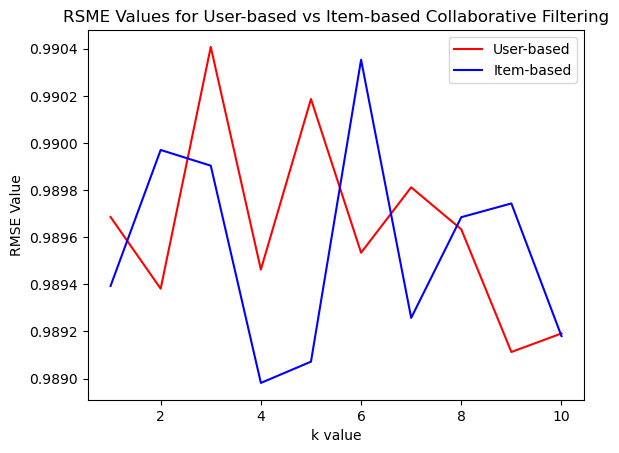

In [33]:
xValues = [1,2,3,4,5,6,7,8,9,10]

plt.plot(xValues, kRMSE, color = 'red', label = 'User-based')
plt.plot(xValues, kRMSEItem, color = 'blue', label = 'Item-based')
plt.xlabel('k value')
plt.ylabel('RMSE Value')
plt.legend(loc="upper right")
plt.title('RSME Values for User-based vs Item-based Collaborative Filtering')

Text(0.5, 1.0, 'MAE Values for User-based vs Item-based Collaborative Filtering')

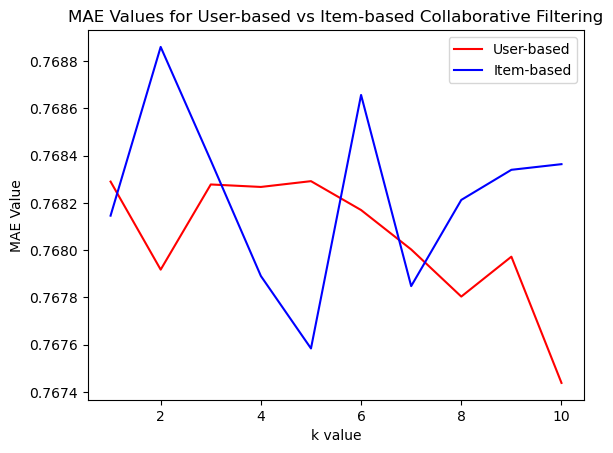

In [34]:
xValues = [1,2,3,4,5,6,7,8,9,10]

plt.plot(xValues, kMAE, color = 'red', label = 'User-based')
plt.plot(xValues, kMAEItem, color = 'blue', label = 'Item-based')
plt.xlabel('k value')
plt.ylabel('MAE Value')
plt.legend(loc="upper right")
plt.title('MAE Values for User-based vs Item-based Collaborative Filtering')

Text(0.5, 1.0, 'Similarity Values for User-based Collaborative Filtering')

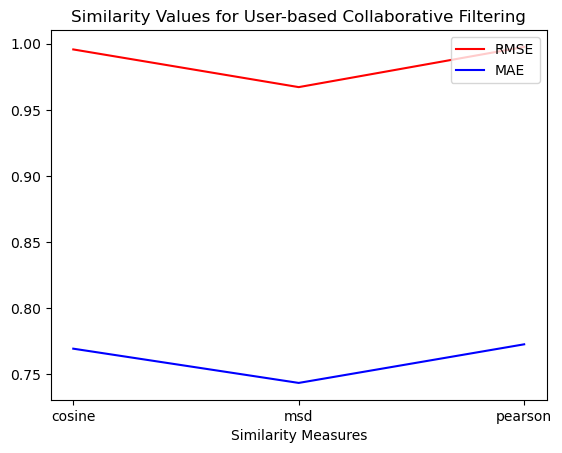

In [8]:
xValues = ["cosine", "msd", "pearson"]
yValUserR = [0.9957, 0.9672, 0.9976]
yValUserM = [0.7694, 0.7435, 0.7727]

yValItemR = [0.9948, 0.9343, 0.9898]
yValItemM = [0.7743, 0.7208, 0.7684]

plt.plot(xValues, yValUserR, color = 'red', label = 'RMSE')
plt.plot(xValues, yValUserM, color = 'blue', label = 'MAE')
plt.xlabel('Similarity Measures')
plt.legend(loc="upper right")
plt.title('Similarity Values for User-based Collaborative Filtering')

Text(0.5, 1.0, 'Similarity Values for Item-based Collaborative Filtering')

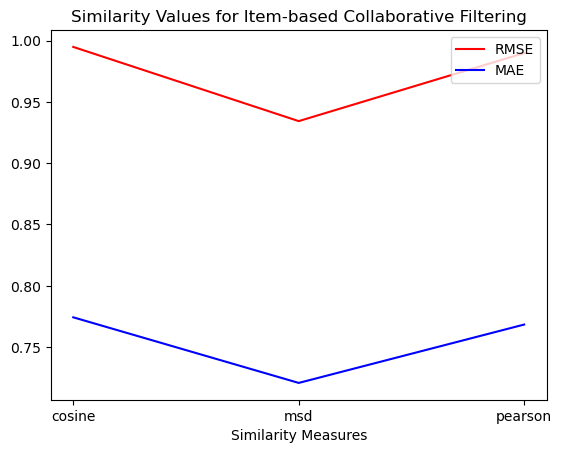

In [9]:
plt.plot(xValues, yValItemR, color = 'red', label = 'RMSE')
plt.plot(xValues, yValItemM, color = 'blue', label = 'MAE')
plt.xlabel('Similarity Measures')
plt.legend(loc="upper right")
plt.title('Similarity Values for Item-based Collaborative Filtering')